# Repo
https://www.kaggle.com/datasets/thoughtvector/customer-support-on-twitter/data

In [1]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load('en_core_web_lg')

In [16]:
# Read the data
data = pd.read_csv('twcs.csv',sep=',',encoding = 'latin1')
data.head(3)

# data_sample = data.head(100)

# Save to new CSV
# data_sample.to_csv('twcs_sample.csv', index=False, encoding='latin1')

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0


1. Definition of the Dataset (5 Points)
- Comprehensive and clear definition: 5 points
- Partially clear definition: 3 points
- Vague or incomplete definition: 1 point

The answer will be...
True appears 1537843 times in the inbound field
False appears 1273931 times in the inbound field


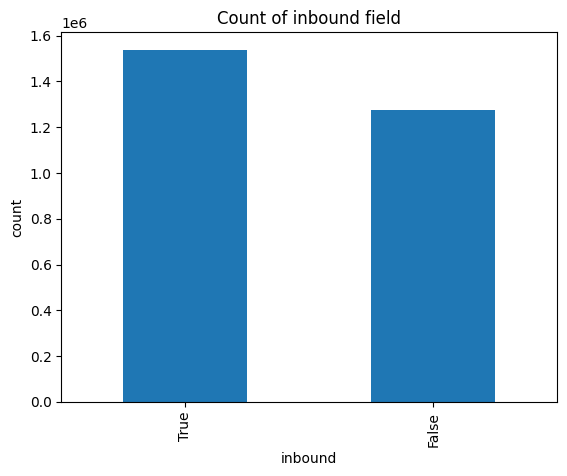

In [17]:
# count the time of label in the field
inbound_counts = data['inbound'][data['inbound'].isin([True, False])].value_counts()

print("The answer will be...")
print("True appears {} times in the inbound field".format(inbound_counts[True]))
print("False appears {} times in the inbound field".format(inbound_counts[False]))

import matplotlib.pyplot as plt

inbound_counts.plot(kind='bar')
plt.title('Count of inbound field')
plt.xlabel('inbound')
plt.ylabel('count')
plt.show()


The answer will be...
WORK_OF_ART appears 2 times in the entities
PERSON appears 17 times in the entities
CARDINAL appears 8 times in the entities
ORG appears 11 times in the entities
DATE appears 11 times in the entities
NORP appears 3 times in the entities
MONEY appears 8 times in the entities
GPE appears 4 times in the entities
TIME appears 4 times in the entities
FAC appears 1 times in the entities


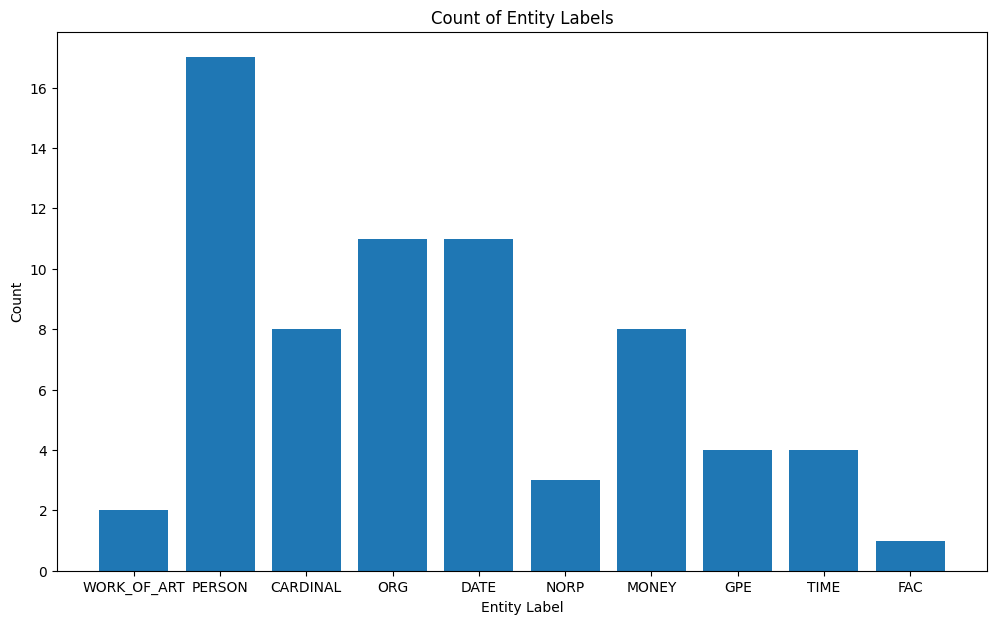

The answer will be...
VERB appears 221 times in the POS tags
PRON appears 243 times in the POS tags
PUNCT appears 183 times in the POS tags
AUX appears 123 times in the POS tags
PART appears 39 times in the POS tags
ADP appears 107 times in the POS tags
DET appears 82 times in the POS tags
ADJ appears 79 times in the POS tags
NOUN appears 247 times in the POS tags
ADV appears 82 times in the POS tags
INTJ appears 20 times in the POS tags
CCONJ appears 36 times in the POS tags
SCONJ appears 44 times in the POS tags
PROPN appears 132 times in the POS tags
NUM appears 28 times in the POS tags
X appears 19 times in the POS tags
SPACE appears 19 times in the POS tags
SYM appears 9 times in the POS tags


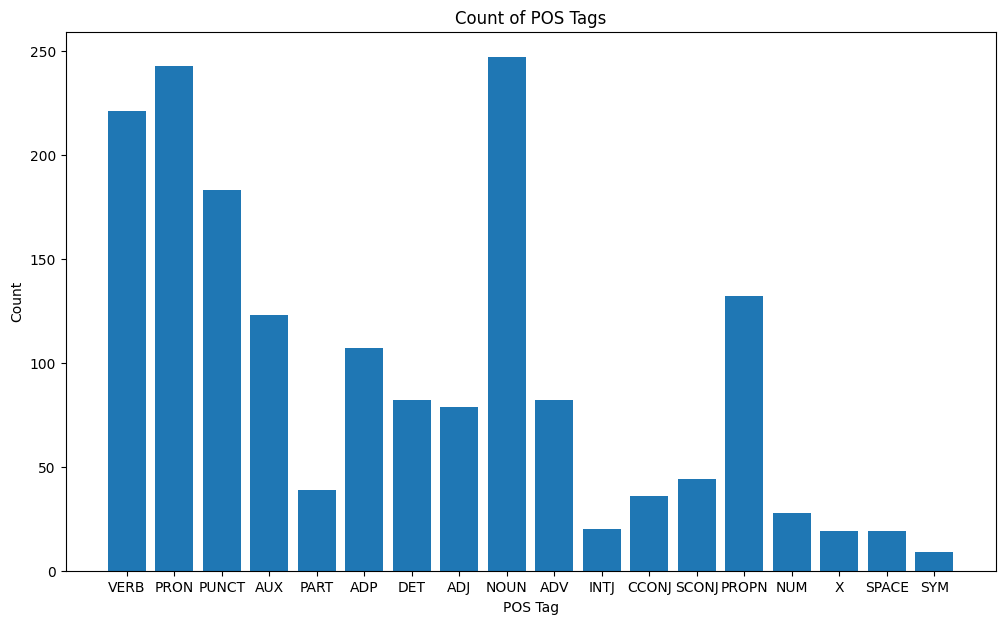

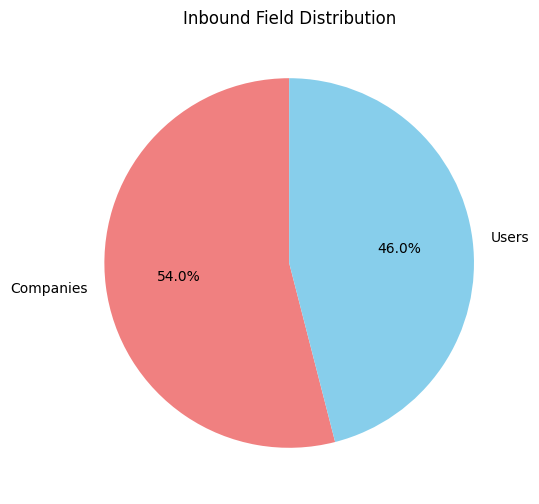

In [18]:
from collections import Counter

# 1. Load data
data = pd.read_csv('twcs_sample.csv', sep=',', encoding='latin1')
texts = data['text'].dropna().tolist()

# 2. Load spaCy model
nlp = spacy.load("en_core_web_lg")

# 3. Process texts
docs = list(nlp.pipe(texts))

# 4. Extract Entities and POS tags
entities = []
pos_tags = []

for doc in docs:
    entities.extend([ent.label_ for ent in doc.ents])
    pos_tags.extend([token.pos_ for token in doc])

# Count the time of each entity label
entity_counts = Counter(entities)

print("The answer will be...")
for label, count in entity_counts.items():
    print("{} appears {} times in the entities".format(label, count))

# Plot
plt.figure(figsize=(12,7))
plt.bar(entity_counts.keys(), entity_counts.values())
plt.title('Count of Entity Labels')
plt.xlabel('Entity Label')
plt.ylabel('Count')
plt.show()

# Count the time of each POS tag
pos_counts = Counter(pos_tags)

print("The answer will be...")
for pos, count in pos_counts.items():
    print("{} appears {} times in the POS tags".format(pos, count))

# Plot
plt.figure(figsize=(12,7))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title('Count of POS Tags')
plt.xlabel('POS Tag')
plt.ylabel('Count')
plt.show()

# Count True/False
inbound_counts = data['inbound'][data['inbound'].isin([True, False])].value_counts()

print("")
# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(inbound_counts, labels=['Companies', 'Users'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Inbound Field Distribution')
plt.show()

2. Visualization of the Dataset Features and Results (15 Points)
- Detailed and insightful visualizations: 15 points
- Basic visualizations with some insights: 10 points
- Minimal effort in visualization: 5 points

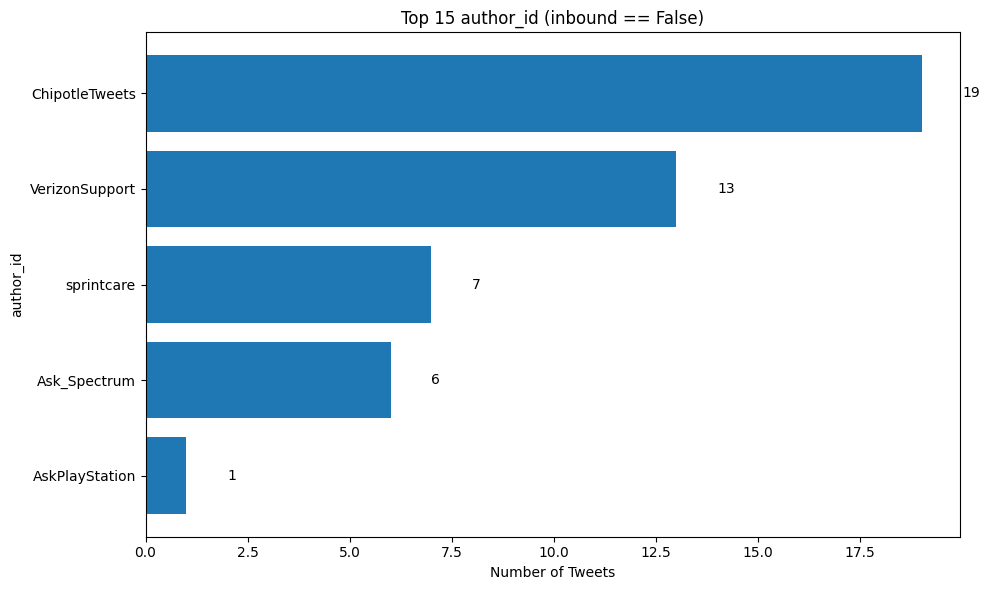

In [19]:
data.replace({'inbound': 'false'}, {'inbound': 'False'})

# Filter for inbound == False (company responses)
company_responses = data[data['inbound'] == False]

# Count number of messages per author_id
author_counts = company_responses['author_id'].value_counts().head(10)

# Plot horizontal bars
plt.figure(figsize=(10, 6))
bars = plt.barh(author_counts.index, author_counts.values)
plt.title('Top 15 author_id (inbound == False)')
plt.xlabel('Number of Tweets')
plt.ylabel('author_id')
plt.gca().invert_yaxis()  # highest at top

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center')

plt.tight_layout()
plt.show()

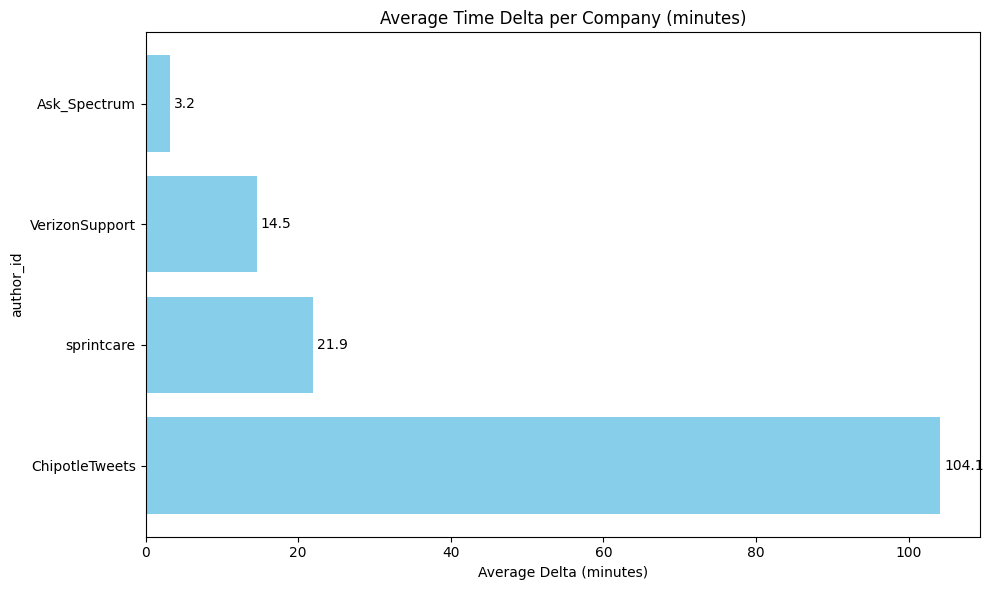

In [20]:
# Convert 'created_at' to datetime
data['created_at'] = pd.to_datetime(data['created_at'], format='%a %b %d %H:%M:%S %z %Y')

# We will only analyze company tweets (inbound == False)
company_data = data[data['inbound'] == False]

# Sort by author_id and datetime (important for delta calculation)
company_data = company_data.sort_values(by=['author_id', 'created_at'])

# Group by author and calculate deltas
company_data['time_delta'] = company_data.groupby('author_id')['created_at'].diff().dt.total_seconds() / 60

# Remove first rows (delta is NaN for first entry of each author)
company_data = company_data.dropna(subset=['time_delta'])

# Now calculate average delta per author
avg_delta_per_author = company_data.groupby('author_id')['time_delta'].mean().sort_values(ascending=True)

# Take top 15 authors for clearer plot
avg_delta_top15 = avg_delta_per_author.head(15)

# Plot horizontal bars
plt.figure(figsize=(10, 6))
plt.barh(avg_delta_top15.index, avg_delta_top15.values, color='skyblue')
plt.title('Average Time Delta per Company (minutes)')
plt.xlabel('Average Delta (minutes)')
plt.ylabel('author_id')
plt.gca().invert_yaxis()
plt.tight_layout()

# Add value labels
for i, v in enumerate(avg_delta_top15.values):
    plt.text(v + 0.5, i, f"{v:.1f}", va='center')

plt.show()


# Reference for visualization https://www.kaggle.com/code/sardiirfansyah/nlp-eda-ner-glove-lstm-gru-cnn-tflite

response-to-satisfaction analysis, word clouds, sentiment trends, topic evolution, and hourly heatmaps.

response-to-satisfaction analysis

word clouds
sentiment trends
topic evolution
hourly heatmaps

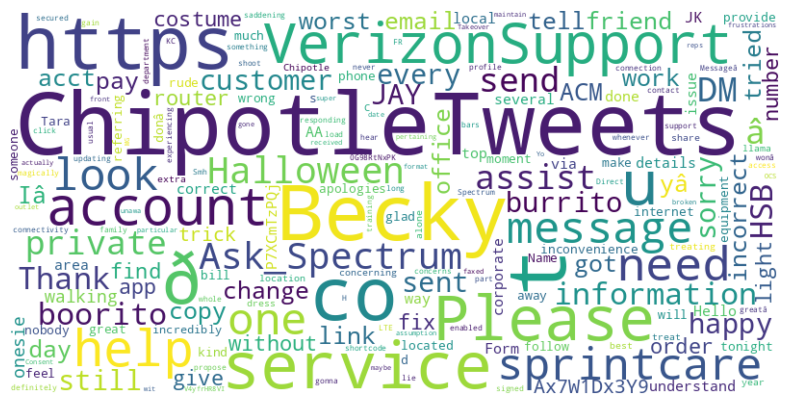

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(' '.join(data['text']))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

3. Cleaning the Text Document with Two Approaches

- Effective use of two distinct cleaning approaches, with clear explanations: 20 points
- Use of two approaches, but with limited explanation or effectiveness: 15 points
- Use of one approach or ineffective cleaning methods: 10 points

In [39]:
# Cleaning Approach 1 
# Regex pre-cleaning -> remove mentions, hashtags, urls), Emoji demojizing + mapping + spaCy lemmatization
# Remove stopwords, punctuations, numbers

import re
import emoji

EMOJI_MAP = {
    # Positive emotions
    ":smile:": "happy",
    ":grinning_face:": "happy",
    ":grinning_face_with_smiling_eyes:": "happy",
    ":beaming_face_with_smiling_eyes:": "very_happy",
    ":face_with_tears_of_joy:": "joy",
    ":rolling_on_the_floor_laughing:": "funny",
    ":wink:": "playful",
    ":blush:": "pleased",
    ":star-struck:": "amazed",
    ":red_heart:": "love",
    ":blue_heart:": "love",
    ":two_hearts:": "love",
    ":sparkling_heart:": "love",
    ":kissing_heart:": "affection",
    ":hugging_face:": "hug",
    ":clapping_hands:": "applause",
    ":thumbs_up:": "positive",
    ":ok_hand:": "approval",
    ":raising_hands:": "celebration",
    ":sun:": "sunny",
    ":fire:": "hot",
    ":star:": "excellent",
    ":trophy:": "victory",
    ":medal:": "achievement",
    ":party_popper:": "celebration",

    # Negative emotions
    ":angry_face:": "angry",
    ":pouting_face:": "angry",
    ":crying_face:": "sad",
    ":loudly_crying_face:": "very_sad",
    ":disappointed_face:": "disappointed",
    ":worried_face:": "worried",
    ":fearful_face:": "fear",
    ":confused_face:": "confused",
    ":tired_face:": "tired",
    ":weary_face:": "exhausted",
    ":face_with_steam_from_nose:": "frustrated",
    ":thumbs_down:": "negative",
    ":broken_heart:": "heartbroken",

    # Neutral / mixed
    ":thinking_face:": "thinking",
    ":neutral_face:": "neutral",
    ":expressionless_face:": "expressionless",
    ":face_with_raised_eyebrow:": "skeptical",
    ":sleeping_face:": "sleepy",
    ":sleepy_face:": "sleepy",
    ":face_with_rolling_eyes:": "annoyed",
    ":zipper-mouth_face:": "speechless",

    # Support-specific
    ":telephone_receiver:": "call",
    ":envelope:": "email",
    ":package:": "delivery",
    ":money_with_wings:": "payment",
    ":credit_card:": "payment",
    ":shopping_cart:": "shopping",

    # General
    ":warning:": "warning",
    ":exclamation_question_mark:": "uncertainty",
    ":hourglass_done:": "waiting",
    ":hourglass_not_done:": "waiting"
}
# First: Light cleaning with simple regex (remove mentions, URLs, hashtags)

def light_clean(text):
    text = text.lower()
    
    # Convert emojis to text code
    text = emoji.demojize(text)
    
    # Replace emoji codes with words
    for emoji_code, meaning in EMOJI_MAP.items():
        text = text.replace(emoji_code, meaning)
    
    # Remove remaining emoji codes (if any unmapped)
    text = re.sub(r':[a-z_]+:', '', text)
    
    # Remove mentions, hashtags, urls
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'#\w+', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply light_clean first to all texts
light_cleaned_texts = [light_clean(t) for t in texts]

# Now run spaCy pipeline in batch mode
docs = nlp.pipe(light_cleaned_texts)
# 
# # Final deep cleaning
cleaned_texts = []
# 
for doc in docs:
    tokens = [
        token.lemma_.lower() 
        for token in doc 
        if not token.is_punct          # remove punctuation
        and not token.is_stop          # remove stopwords
        and not token.like_num         # remove numbers
        and not token.is_space         # remove extra spaces
    ]
    cleaned_texts.append(" ".join(tokens))

# # OPTIONAL: Store back into dataframe
data['cleaned_text'] = cleaned_texts

data['cleaned_text'].to_csv('valid1.csv')
# # Display first few rows
print(data[['text', 'cleaned_text']].head(3))

print(type(cleaned_texts))

                                                text  \
0  @115712 I understand. I would like to assist y...   
1      @sprintcare and how do you propose we do that   
2  @sprintcare I have sent several private messag...   

                                        cleaned_text  
0  understand like assist need private secure lin...  
1                                            propose  
2                 send private message respond usual  
<class 'list'>


In [44]:
# Cleaning Approach 2
# Use spaCy entity filtering (NER-based cleaning)
# Custom filtering rules using spaCy token attributes

data = pd.read_csv('twcs_sample.csv',sep=',',encoding = 'latin1')
# data.head(3)

texts = data['text'].dropna().tolist()

# Alternative clean function
def alternative_clean(text):
    doc = nlp(text.lower())
    
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop            # remove stopwords
        and not token.is_punct          # remove punctuation
        and not token.like_num          # remove numbers
        and not token.like_url          # remove urls automatically (spaCy can detect)
        and not token.is_space          # remove extra spaces
        and not token.is_email          # remove emails
        and not token.text.startswith('@') # remove mentions
        and not token.text.startswith('#') # remove hashtags
    ]
    return " ".join(tokens)

# Apply pipeline using nlp.pipe() for efficiency
docs = nlp.pipe(texts)
cleaned_texts = []
# 
for doc in docs:
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop
        and not token.is_punct
        and not token.like_num
        and not token.like_url
        and not token.is_space
        # and not token.is_email
        and not token.text.startswith('@')
        and not token.text.startswith('#')
    ]
    cleaned_texts.append(" ".join(tokens))
# 
# # Add back into dataframe
data['alt_cleaned_text'] = cleaned_texts

data['alt_cleaned_text'].to_csv('valid2.csv')

# # Show sample output
print(data[['text', 'alt_cleaned_text']].head())

                                                text  \
0  @115712 I understand. I would like to assist y...   
1      @sprintcare and how do you propose we do that   
2  @sprintcare I have sent several private messag...   
3  @115712 Please send us a Private Message so th...   
4                                 @sprintcare I did.   

                                    alt_cleaned_text  
0  understand like assist need private secure lin...  
1                                            propose  
2                 send private message respond usual  
3  send private message assist click âmessageâ...  
4                                                     


4. Implementation of Three Word Embedding Methods (30 Points)
- Comprehensive and effective implementation of three methods, including one with SpaCy: 30 points
- Implementation of three methods, but with minor issues or lack of depth: 20 points
- Implementation of less than three methods or major issues in implementation: 10 points

In [ ]:
import time
from sklearn.feature_extraction.text import CountVectorizer

def bow(text):

    # Initialize BoW vectorizer
    vectorizer_bow = CountVectorizer()

    # Fit and transform
    X_bow = vectorizer_bow.fit_transform(cleaned_texts)

    print("BoW shape:", X_bow.shape)
    
    return X_bow

In [65]:
def tfidf(text):

    # Initialize TF-IDF vectorizer
    vectorizer_tfidf = TfidfVectorizer()

    # Fit and transform
    X_tfidf = vectorizer_tfidf.fit_transform(cleaned_texts)

    print("TF-IDF shape:", X_tfidf.shape)
    
    return X_tfidf


In [64]:
def bert(text):

    # Load pre-trained model
    model = SentenceTransformer('all-MiniLM-L6-v2')  # lightweight, fast and accurate

    # Generate sentence embeddings
    X_bert = model.encode(cleaned_texts)

    print("Sentence-BERT embeddings shape:", X_bert.shape)
    
    return X_bert


In [66]:
import numpy as np

# Create dictionary of methods
embedding_methods = {
    "BoW": bow,
    "TF-IDF": tfidf,
    "spaCy": bert
}

# Start timer
start_time = time.time()

# Loop over each embedding method and calculate processing time
for name, method in embedding_methods.items():
    print(f"\nProcessing: {name}")
    start_time = time.time()
    X = method(cleaned_texts)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Output dimensions
    if isinstance(X, np.ndarray):
        shape = X.shape
    else:
        shape = X.shape  # sparse matrix shape works here too
    
    print(f"Shape: {shape}")
    print(f"Processing time: {elapsed_time:.4f} seconds")


Processing: BoW
BoW shape: (100, 331)
Shape: (100, 331)
Processing time: 0.0071 seconds

Processing: TF-IDF
TF-IDF shape: (100, 331)
Shape: (100, 331)
Processing time: 0.0236 seconds

Processing: spaCy
Sentence-BERT embeddings shape: (100, 384)
Shape: (100, 384)
Processing time: 2.1856 seconds


5. Comparison of the Results of Word Embedding Methods (10 Points)
- In-depth and insightful comparison, with clear findings: 10 points
- Basic comparison with some insights: 7 points
- Superficial comparison or missing key aspects: 5 points

6. Report and Description of Work Done (20 Points)
- Comprehensive and well-structured report, clearly describing all aspects of the project: 20 points
- Adequately detailed report with minor omissions or structural issues: 15 points
- Poorly structured report with significant omissions: 10 points